In [1]:
#hide
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML
%matplotlib inline
sns.set()

In [2]:
#hide
url = ('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/'
       'csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df = pd.read_csv(url)
# rename countries
df['Country/Region'] = df['Country/Region'].replace({'Korea, South': 'South Korea'})
df = df[~df['Country/Region'].isin(['Cruise Ship'])]   # Remove Ships
dt_cols = df.columns[~df.columns.isin(['Province/State', 'Country/Region', 'Lat', 'Long'])]

In [3]:
#hide
dff = (df.groupby('Country/Region')[dt_cols].sum()
       .stack().reset_index(name='Confirmed Cases')
       .rename(columns={'level_1': 'Date', 'Country/Region': 'Country'}))
dff['Date'] = pd.to_datetime(dff['Date'], format='%m/%d/%y')

In [4]:
#hide
countries = ['Lithuania', 'Poland', 'Greece', 'Italy', 'United Kingdom', 'Germany', 'Czechia', 'US', 'Estonia', 'France', 'Japan', 'South Korea', 'Latvia', 'Spain']

In [5]:
#hide
SINCE_CASES_NUM = 100
dff2 = dff[dff['Country'].isin(countries)].copy()
days_since = (dff2.assign(F=dff2['Confirmed Cases'].ge(SINCE_CASES_NUM))
              .set_index('Date')
              .groupby('Country')['F'].transform('idxmax'))
dff2['Days since 100 cases'] = (dff2['Date'] - days_since.values).dt.days.values
dff2 = dff2[dff2['Days since 100 cases'].ge(0)]

In [6]:
dff2

,Country,Date,Confirmed Cases,Days since 100 cases
2697,Czechia,2020-03-13,141,0
2698,Czechia,2020-03-14,189,1
2699,Czechia,2020-03-15,253,2
2700,Czechia,2020-03-16,298,3
2701,Czechia,2020-03-17,396,4
...,...,...,...,...
10327,United Kingdom,2020-03-20,4014,15
10328,United Kingdom,2020-03-21,5067,16
10329,United Kingdom,2020-03-22,5745,17
10330,United Kingdom,2020-03-23,6726,18


In [8]:
country_df = dff2[dff2['Country']=='Italy']
country_df

,Country,Date,Confirmed Cases,Days since 100 cases
5072,Italy,2020-02-23,155,0
5073,Italy,2020-02-24,229,1
5074,Italy,2020-02-25,322,2
5075,Italy,2020-02-26,453,3
5076,Italy,2020-02-27,655,4
5077,Italy,2020-02-28,888,5
5078,Italy,2020-02-29,1128,6
5079,Italy,2020-03-01,1694,7
5080,Italy,2020-03-02,2036,8
5081,Italy,2020-03-03,2502,9


In [10]:
nb_of_cases = country_df['Confirmed Cases'].values.astype(float)
nb_of_cases

array([  155.,   229.,   322.,   453.,   655.,   888.,  1128.,  1694.,
        2036.,  2502.,  3089.,  3858.,  4636.,  5883.,  7375.,  9172.,
       10149., 12462., 12462., 17660., 21157., 24747., 27980., 31506.,
       35713., 41035., 47021., 53578., 59138., 63927., 69176.])

In [11]:
len(nb_of_cases)

31

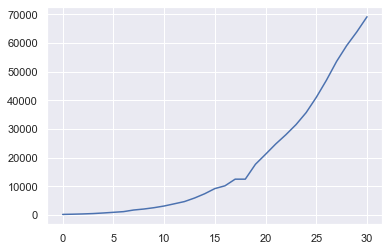

In [12]:
plt.plot(nb_of_cases)

### Autoregression

In [12]:
from statsmodels.tsa.ar_model import AR

In [18]:
model = AR(nb_of_cases)
model_fit = model.fit()

In [17]:
yhat = model_fit.predict(len(nb_of_cases), len(nb_of_cases))
print(yhat)

[9112.99925352]


### Polynomial regression

In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [14]:
x_ = np.array(range(0,len(nb_of_cases)))

In [15]:
# model = LinearRegression()
# model.fit(x_.reshape(-1, 1), nb_of_cases.reshape(-1, 1))

In [18]:
p = np.poly1d(np.polyfit(x_, nb_of_cases, 3))

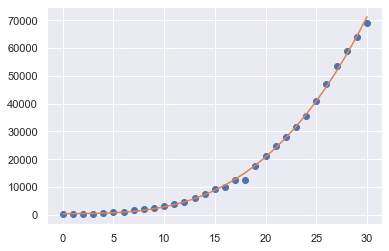

In [19]:
plt.plot(x_, nb_of_cases, 'o', x_, p(x_), '-')
plt.show()